In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing and Cleaning for Crime Data

In [ ]:
# Importing Dataframes
crimes = pd.read_csv(
    "data/crimes_combined.csv",
    index_col=0,
    dtype={
        "beat": "Int64",
        "community_area": str,
        "fbi_code": str,
    },
    low_memory=False,
)
codes = pd.read_csv("data/IUCR_Codes.csv", index_col=0)

In [ ]:
crimes['date'] = pd.to_datetime(crimes['date'])
crimes['domestic'] = crimes['domestic'].astype(str).str.lower()
crimes['domestic'] = crimes['domestic'].apply(lambda x: True if x != 'false' else False)

crimes.sort_values(by='date', ascending=False, inplace=True)

In [ ]:
# Removing leading zeros from IUCR codes because of mistmatch between the two datasets.
codes.index = codes.index.str.lstrip("0")
crimes["iucr"] = crimes["iucr"].str.lstrip("0")

In [ ]:
print(crimes.columns)
print(codes.columns)

print(crimes.shape)
print(codes.shape)

print(crimes.dtypes)
print(codes.dtypes)

In [ ]:
# Joining crimes and IUCR codes datasets
joined = crimes.join(other=codes[["PRIMARY DESCRIPTION", "SECONDARY DESCRIPTION"]], on="iucr", how="left")

In [ ]:
print(joined.shape)
joined.head()

#### Importing and Cleaning Weather Data

In [72]:
weather = pd.read_csv("data/weather_data.csv", low_memory=False)

In [73]:
weather.columns = [column.lower() for column in weather.columns]
weather['date'] = pd.to_datetime(weather['date'])

weather.sort_values(by="date", ascending=False, inplace=True)

In [74]:
weather.dtypes

station            object
name               object
date       datetime64[ns]
awnd              float64
fmtm              float64
pgtm              float64
prcp              float64
snow              float64
snwd              float64
tavg              float64
tmax              float64
tmin              float64
tsun              float64
wdf2              float64
wdf5              float64
wesd              float64
wsf2              float64
wsf5              float64
wt01              float64
wt02              float64
wt03              float64
wt04              float64
wt05              float64
wt06              float64
wt07              float64
wt08              float64
wt09              float64
wt10              float64
wt11              float64
wt13              float64
wt14              float64
wt15              float64
wt16              float64
wt17              float64
wt18              float64
wt19              float64
wt21              float64
wt22              float64
wv03        

In [83]:
metric_columns = weather.columns[:13].drop(['station', 'date', 'name', 'tsun'])

In [84]:
across_stations = weather.groupby(by='date')[metric_columns].agg('mean')
across_stations.reset_index(inplace=True)

### Basic Visualizations

In [98]:
monthly = across_stations.groupby(across_stations["date"].dt.to_period("M"))[
    ["awnd", "fmtm", "pgtm", "prcp", "snow", "snwd", "tavg", "tmax", "tmin"]
]

monthly_averages = monthly.agg("mean").reset_index(names='period')
monthly_totals = monthly.agg("sum").reset_index(names='period')

In [99]:
monthly_averages
monthly_totals

,period,awnd,fmtm,pgtm,prcp,snow,snwd,tavg,tmax,tmin
0,2000-01,340.705,35994.0,36852.0,1.000,13.6,56.0,811.5,1009.0,585.5
1,2000-02,327.270,40481.0,39784.5,1.430,11.6,78.0,1031.0,1255.0,794.5
2,2000-03,311.705,38891.5,39955.5,1.085,0.0,0.0,1405.0,1748.0,1084.5
3,2000-04,310.170,40780.0,40161.5,4.620,1.6,1.0,1461.5,1762.5,1148.5
4,2000-05,303.885,44216.0,42602.0,4.940,0.0,0.0,1964.0,2262.0,1650.0
...,...,...,...,...,...,...,...,...,...,...
294,2024-07,223.570,0.0,0.0,6.100,0.0,0.0,2311.0,2605.0,2078.0
295,2024-08,245.600,0.0,1480.0,3.170,0.0,0.0,2308.0,2603.5,2058.0
296,2024-09,236.455,0.0,5683.0,1.605,0.0,0.0,2118.0,2414.0,1854.0
297,2024-10,298.750,0.0,1220.0,1.200,0.0,0.0,1852.0,2181.0,1545.0


<BarContainer object of 299 artists>

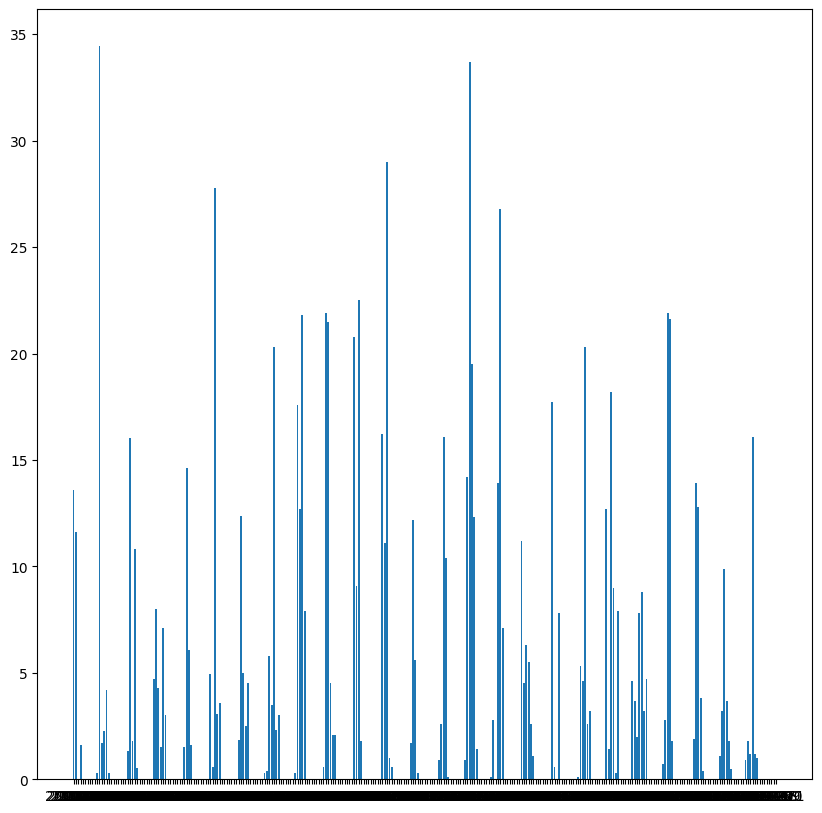

In [102]:
plt.figure(figsize=(10, 10))

plt.bar(monthly_totals['period'].astype(str), monthly_totals['snow'])